In [1]:
import pandas as pd
import numpy as np


In [2]:
# Preview before loading full dataset
sample = pd.read_csv('BWND Blocks Analysis Final.tsv', 
                     sep='\t', 
                     nrows=5)  # Only first 5 rows

print("📋 Column names:")
print(sample.columns.tolist())
print("\n📊 Data types:")
print(sample.dtypes)
print("\n👀 Sample data:")
print(sample.head())


📋 Column names:
['warehouse_id', 'block_start_datetime_utc', 'block_start_datetime_local', 'duration', 'guaranteed_earnings_price_per_hr', 'block_length', 'block_start_wave', 'wave_mins', 'promisewindow', 'promisewindownumber', 'sum_metric_rlp_adds', 'avg_metric_rlp_adds', 'max_metric_rlp_adds', 'min_metric_rlp_adds', 'avg_max_min_metric_rlp_adds', 'sum_checked_in_blocks', 'sum_attended_blocks', 'sum_bwnd_blocks', 'sum_surged_blocks', 'sum_extended_blocks']

📊 Data types:
warehouse_id                         object
block_start_datetime_utc             object
block_start_datetime_local           object
duration                            float64
guaranteed_earnings_price_per_hr    float64
block_length                        float64
block_start_wave                     object
wave_mins                             int64
promisewindow                        object
promisewindownumber                   int64
sum_metric_rlp_adds                   int64
avg_metric_rlp_adds                   i

In [3]:
# Best approach for your specific data
df = pd.read_csv('BWND Blocks Analysis Final.tsv', 
                 sep='\t',
                 parse_dates=['block_start_datetime_utc', 'block_start_datetime_local'],
                 dtype={
                     'warehouse_id': 'category',
                     'promisewindow': 'category',
                     'duration': 'float32',
                     'guaranteed_earnings_price_per_hr': 'float32',
                     'block_length': 'float32',
                     'wave_mins': 'int16',
                     'promisewindownumber': 'int16'
                 })

print(f"✅ Successfully loaded {len(df):,} rows × {len(df.columns)} columns")
print(f"📊 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
df.info()


✅ Successfully loaded 1,259,866 rows × 20 columns
📊 Memory usage: 203.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259866 entries, 0 to 1259865
Data columns (total 20 columns):
 #   Column                            Non-Null Count    Dtype         
---  ------                            --------------    -----         
 0   warehouse_id                      1259866 non-null  category      
 1   block_start_datetime_utc          1259866 non-null  datetime64[ns]
 2   block_start_datetime_local        1259866 non-null  datetime64[ns]
 3   duration                          1259866 non-null  float32       
 4   guaranteed_earnings_price_per_hr  1259866 non-null  float32       
 5   block_length                      1259866 non-null  float32       
 6   block_start_wave                  1259866 non-null  object        
 7   wave_mins                         1259866 non-null  int16         
 8   promisewindow                     1259866 non-null  category      
 9   promisewindownu

In [4]:
df.to_pickle('processed_bwnd_data.pkl')  # Save
df = pd.read_pickle('processed_bwnd_data.pkl')  # Load


In [5]:
df.head()

,warehouse_id,block_start_datetime_utc,block_start_datetime_local,duration,guaranteed_earnings_price_per_hr,block_length,block_start_wave,wave_mins,promisewindow,promisewindownumber,sum_metric_rlp_adds,avg_metric_rlp_adds,max_metric_rlp_adds,min_metric_rlp_adds,avg_max_min_metric_rlp_adds,sum_checked_in_blocks,sum_attended_blocks,sum_bwnd_blocks,sum_surged_blocks,sum_extended_blocks
0,C212,2025-08-18 23:00:00,2025-08-18 18:00:00,90.0,19.5,1.5,18:00,0,BEDTIME,22,4,2,2,2,2,1,1,1,2.0,0
1,C212,2025-08-18 23:00:00,2025-08-18 18:00:00,90.0,19.5,1.5,18:00,0,BEDTIME,22,4,2,2,2,2,1,1,1,2.0,0
2,C227,2025-08-15 21:00:00,2025-08-15 17:00:00,90.0,15.0,1.5,17:00,0,BEDTIME,22,4,2,2,2,2,2,2,0,1.0,0
3,C227,2025-08-15 21:00:00,2025-08-15 17:00:00,90.0,15.0,1.5,17:00,0,BEDTIME,22,4,2,2,2,2,2,2,0,1.0,0
4,C227,2025-08-16 01:00:00,2025-08-15 21:00:00,90.0,15.0,1.5,21:00,0,BEDTIME,22,1,1,1,1,1,1,1,0,1.0,0


In [6]:
'''
Creating two new columns as requested:

BWND_happened: 1 if sum_bwnd_blocks > 0, else 0
RLP_happened: 1 if sum_metric_rlp_adds > 0, else 0
'''


# BWND_happened: 1 if sum_bwnd_blocks > 0, else 0
df['BWND_happened'] = (df['sum_bwnd_blocks'] > 0).astype(int)

# RLP_happened: 1 if sum_metric_rlp_adds > 0, else 0  
df['RLP_happened'] = (df['sum_metric_rlp_adds'] > 0).astype(int)
df.head()

,warehouse_id,block_start_datetime_utc,block_start_datetime_local,duration,guaranteed_earnings_price_per_hr,block_length,block_start_wave,wave_mins,promisewindow,promisewindownumber,...,max_metric_rlp_adds,min_metric_rlp_adds,avg_max_min_metric_rlp_adds,sum_checked_in_blocks,sum_attended_blocks,sum_bwnd_blocks,sum_surged_blocks,sum_extended_blocks,BWND_happened,RLP_happened
0,C212,2025-08-18 23:00:00,2025-08-18 18:00:00,90.0,19.5,1.5,18:00,0,BEDTIME,22,...,2,2,2,1,1,1,2.0,0,1,1
1,C212,2025-08-18 23:00:00,2025-08-18 18:00:00,90.0,19.5,1.5,18:00,0,BEDTIME,22,...,2,2,2,1,1,1,2.0,0,1,1
2,C227,2025-08-15 21:00:00,2025-08-15 17:00:00,90.0,15.0,1.5,17:00,0,BEDTIME,22,...,2,2,2,2,2,0,1.0,0,0,1
3,C227,2025-08-15 21:00:00,2025-08-15 17:00:00,90.0,15.0,1.5,17:00,0,BEDTIME,22,...,2,2,2,2,2,0,1.0,0,0,1
4,C227,2025-08-16 01:00:00,2025-08-15 21:00:00,90.0,15.0,1.5,21:00,0,BEDTIME,22,...,1,1,1,1,1,0,1.0,0,0,1


In [ ]:
# Method 2: Preventable Waste (minimum overlap)
df['preventable_waste'] = np.minimum(df['sum_bwnd_blocks'], df['avg_max_min_metric_rlp_adds'])

 # Method 5: Total Waste (BWND + min)
df['total_waste'] = df['sum_bwnd_blocks'] + df['preventable_waste'] 

# Additional metrics 
df['remaining_idle'] = np.maximum(0, df['sum_bwnd_blocks'] - df['avg_max_min_metric_rlp_adds'])
df['waste_severity_pct'] = np.where(
    df['avg_max_min_metric_rlp_adds'] > 0,
    (df['preventable_waste'] / df['avg_max_min_metric_rlp_adds'] * 100).round(2),
    0
)

df['cost_impact_preventable_waste'] = df['preventable_waste'] * df['guaranteed_earnings_price_per_hr'] * (df['duration'] / 60)
df['cost_impact_total_waste'] = df['total_waste'] * df['guaranteed_earnings_price_per_hr'] * (df['duration'] / 60)


In [14]:
'''
Additionally columns based on the binary columns created above

'''

# Column 1: BWND >= avg_max_min_metric_rlp_adds
df['BWND_gte_RLP_avg'] = (df['sum_bwnd_blocks'] >= df['avg_max_min_metric_rlp_adds']).astype(int)

# Column 2: BWND < avg_max_min_metric_rlp_adds
df['BWND_lt_RLP_avg'] = (df['sum_bwnd_blocks'] < df['avg_max_min_metric_rlp_adds']).astype(int)

# Column 3: Difference (avg_max_min_metric_rlp_adds - sum_bwnd_blocks)
df['RLP_avg_minus_BWND'] = df['avg_max_min_metric_rlp_adds'] - df['sum_bwnd_blocks']

In [15]:
df.head()

,warehouse_id,block_start_datetime_utc,block_start_datetime_local,duration,guaranteed_earnings_price_per_hr,block_length,block_start_wave,wave_mins,promisewindow,promisewindownumber,...,RLP_happened,BWND_gte_RLP_avg,BWND_lt_RLP_avg,RLP_avg_minus_BWND,preventable_waste,total_waste,remaining_idle,waste_severity_pct,cost_impact_preventable_waste,cost_impact_total_waste
0,C212,2025-08-18 23:00:00,2025-08-18 18:00:00,90.0,19.5,1.5,18:00,0,BEDTIME,22,...,1,0,1,1,1,2,0,50.0,29.25,58.5
1,C212,2025-08-18 23:00:00,2025-08-18 18:00:00,90.0,19.5,1.5,18:00,0,BEDTIME,22,...,1,0,1,1,1,2,0,50.0,29.25,58.5
2,C227,2025-08-15 21:00:00,2025-08-15 17:00:00,90.0,15.0,1.5,17:00,0,BEDTIME,22,...,1,0,1,2,0,0,0,0.0,0.00,0.0
3,C227,2025-08-15 21:00:00,2025-08-15 17:00:00,90.0,15.0,1.5,17:00,0,BEDTIME,22,...,1,0,1,2,0,0,0,0.0,0.00,0.0
4,C227,2025-08-16 01:00:00,2025-08-15 21:00:00,90.0,15.0,1.5,21:00,0,BEDTIME,22,...,1,0,1,1,0,0,0,0.0,0.00,0.0


In [16]:
print(f"'BWND_happened' column: {df['BWND_happened'].sum():,} blocks with BWND")
print(f"'RLP_happened' column: {df['RLP_happened'].sum():,} blocks with RLP requests")


print(f"'BWND_gte_RLP_avg' column: {df['BWND_gte_RLP_avg'].sum():,} blocks where BWND >= RLP avg")
print(f"'BWND_lt_RLP_avg' column: {df['BWND_lt_RLP_avg'].sum():,} blocks where BWND < RLP avg")
print(f"'RLP_avg_minus_BWND' column: Average difference = {df['RLP_avg_minus_BWND'].mean():.2f}")
print(f"preventable_waste' column: Total wasted blocks = {df['preventable_waste'].sum():,.0f}")
print(f"total_waste' column: Total wasted blocks = {df['total_waste'].sum():,.0f}")
print(f"'cost_impact_preventable_waste' column: Total cost impact = ${df['cost_impact_preventable_waste'].sum():,.2f}")
print(f"'cost_impact_total_waste' column: Total cost impact = ${df['cost_impact_total_waste'].sum():,.2f}")

# Show the new columns
print("\n📊 New Columns Summary:")
print(df[['sum_bwnd_blocks', 'BWND_happened', 'sum_metric_rlp_adds', 'RLP_happened','BWND_gte_RLP_avg', 'BWND_lt_RLP_avg', 'RLP_avg_minus_BWND', 'preventable_waste', 'total_waste', 'cost_impact_preventable_waste', 'cost_impact_total_waste']].head(10))

'BWND_happened' column: 729,928 blocks with BWND
'RLP_happened' column: 1,259,866 blocks with RLP requests
'BWND_gte_RLP_avg' column: 574,483 blocks where BWND >= RLP avg
'BWND_lt_RLP_avg' column: 685,383 blocks where BWND < RLP avg
'RLP_avg_minus_BWND' column: Average difference = -16.39
preventable_waste' column: Total wasted blocks = 5,108,295
total_waste' column: Total wasted blocks = 33,759,309
'cost_impact_preventable_waste' column: Total cost impact = $431,110,082.75
'cost_impact_total_waste' column: Total cost impact = $2,557,445,746.00

📊 New Columns Summary:
   sum_bwnd_blocks  BWND_happened  sum_metric_rlp_adds  RLP_happened  \
0                1              1                    4             1   
1                1              1                    4             1   
2                0              0                    4             1   
3                0              0                    4             1   
4                0              0                    1           

In [17]:
# Filter for rows where RLP_happened equals 1
rlp_happened_df = df[df['RLP_happened'] == 1]

# Calculate counts
total_rlp_happened = len(rlp_happened_df)
bwnd_1_count = (rlp_happened_df['BWND_happened'] == 1).sum()
bwnd_0_count = (rlp_happened_df['BWND_happened'] == 0).sum()

# Calculate percentages
bwnd_1_pct = (bwnd_1_count / total_rlp_happened * 100) if total_rlp_happened > 0 else 0
bwnd_0_pct = (bwnd_0_count / total_rlp_happened * 100) if total_rlp_happened > 0 else 0

# Print results
print(f"When RLP_happened = 1 (Total: {total_rlp_happened:,} rows):")
print(f"  BWND_happened = 1: {bwnd_1_count:,} rows ({bwnd_1_pct:.2f}%)")
print(f"  BWND_happened = 0: {bwnd_0_count:,} rows ({bwnd_0_pct:.2f}%)")

When RLP_happened = 1 (Total: 1,259,866 rows):
  BWND_happened = 1: 729,928 rows (57.94%)
  BWND_happened = 0: 529,938 rows (42.06%)


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ============================================================================
# 1. Block_length Distribution for ALL BWND cases
# ============================================================================
print("="*70)
print("BLOCK_LENGTH DISTRIBUTION - ALL CASES")
print("="*70)

# Descriptive statistics
print("\nDescriptive Statistics:")
print(df['block_length'].describe())

# Value counts
print("\nTop 20 Block Lengths:")
block_dist = df['block_length'].value_counts().sort_index()
block_pct = df['block_length'].value_counts(normalize=True).mul(100).sort_index()

print(pd.DataFrame({
    'block_length': block_dist.head(20).index,
    'Count': block_dist.head(20).values,
    'Percentage': block_pct.head(20).values.round(2)
}))


# ============================================================================
# 2. Block_length Distribution when BWND_happened = 1 AND RLP_happened = 1
# ============================================================================
print("\n" + "="*70)
print("BLOCK_LENGTH DISTRIBUTION - When BWND=1 AND RLP=1")
print("="*70)

# Filter data
filtered_df = df[(df['BWND_happened'] == 1) & (df['RLP_happened'] == 1)]

print(f"\nTotal rows where both BWND=1 and RLP=1: {len(filtered_df):,}")

# Descriptive statistics
print("\nDescriptive Statistics:")
print(filtered_df['block_length'].describe())

# Value counts
print("\nTop 20 Block Lengths:")
filtered_block_dist = filtered_df['block_length'].value_counts().sort_index()
filtered_block_pct = filtered_df['block_length'].value_counts(normalize=True).mul(100).sort_index()

print(pd.DataFrame({
    'block_length': filtered_block_dist.head(20).index,
    'Count': filtered_block_dist.head(20).values,
    'Percentage': filtered_block_pct.head(20).values.round(2)
}))


BLOCK_LENGTH DISTRIBUTION - ALL CASES

Descriptive Statistics:
count    1.259866e+06
mean     3.759664e+00
std      8.802985e-01
min      1.000000e+00
25%      3.500000e+00
50%      4.000000e+00
75%      4.500000e+00
max      5.000000e+00
Name: block_length, dtype: float64

Top 20 Block Lengths:
   block_length   Count  Percentage
0           1.0    7954        0.63
1           1.5   20747        1.65
2           2.0   98315        7.80
3           2.5   45119        3.58
4           3.0  140302       11.14
5           3.5  173255       13.75
6           4.0  320496       25.44
7           4.5  379004       30.08
8           5.0   74674        5.93

BLOCK_LENGTH DISTRIBUTION - When BWND=1 AND RLP=1

Total rows where both BWND=1 and RLP=1: 729,928

Descriptive Statistics:
count    729928.000000
mean          3.858486
std           0.845590
min           1.000000
25%           3.500000
50%           4.000000
75%           4.500000
max           5.000000
Name: block_length, dtype: float64

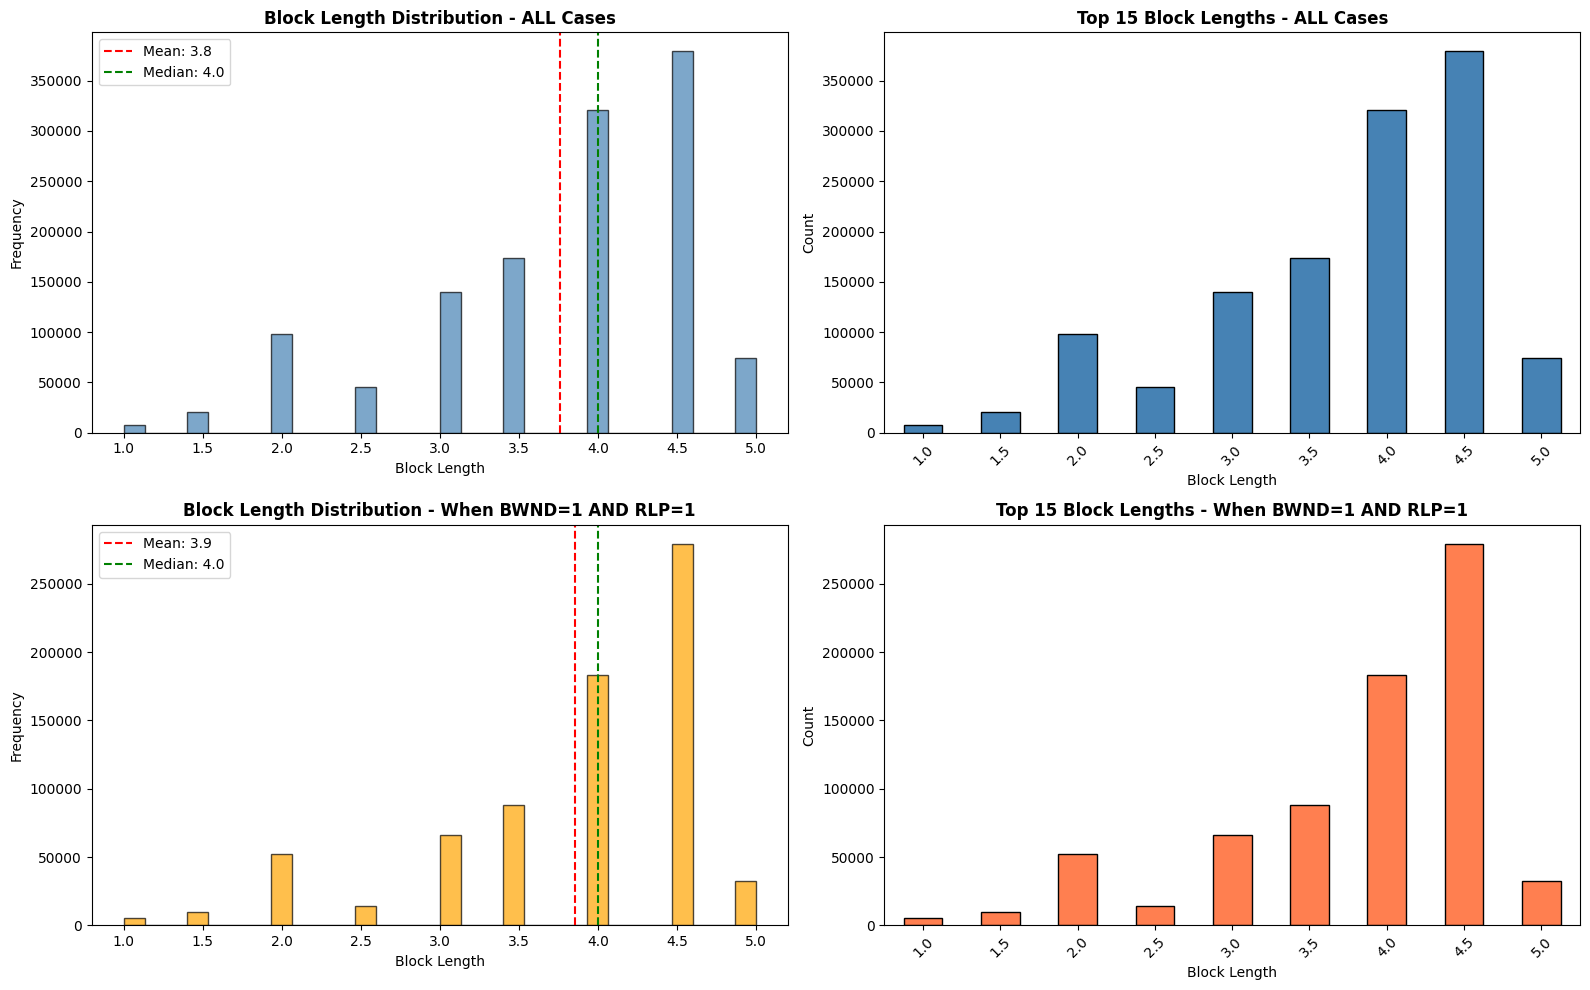

In [22]:

# ============================================================================
# 3. VISUALIZATION
# ============================================================================
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: All Cases - Histogram
axes[0, 0].hist(df['block_length'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_title('Block Length Distribution - ALL Cases', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Block Length')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['block_length'].mean(), color='red', linestyle='--', label=f'Mean: {df["block_length"].mean():.1f}')
axes[0, 0].axvline(df['block_length'].median(), color='green', linestyle='--', label=f'Median: {df["block_length"].median():.1f}')
axes[0, 0].legend()

# Plot 2: All Cases - Top 15 Block Lengths Bar Chart
top_15_all = df['block_length'].value_counts().head(15).sort_index()
top_15_all.plot(kind='bar', ax=axes[0, 1], color='steelblue', edgecolor='black')
axes[0, 1].set_title('Top 15 Block Lengths - ALL Cases', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Block Length')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Filtered - Histogram
axes[1, 0].hist(filtered_df['block_length'], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[1, 0].set_title('Block Length Distribution - When BWND=1 AND RLP=1', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Block Length')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(filtered_df['block_length'].mean(), color='red', linestyle='--', label=f'Mean: {filtered_df["block_length"].mean():.1f}')
axes[1, 0].axvline(filtered_df['block_length'].median(), color='green', linestyle='--', label=f'Median: {filtered_df["block_length"].median():.1f}')
axes[1, 0].legend()

# Plot 4: Filtered - Top 15 Block Lengths Bar Chart
top_15_filtered = filtered_df['block_length'].value_counts().head(15).sort_index()
top_15_filtered.plot(kind='bar', ax=axes[1, 1], color='coral', edgecolor='black')
axes[1, 1].set_title('Top 15 Block Lengths - When BWND=1 AND RLP=1', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Block Length')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



In [23]:

# ============================================================================
# 4. COMPARISON TABLE
# ============================================================================
print("\n" + "="*70)
print("COMPARISON: ALL vs BWND=1 & RLP=1")
print("="*70)

comparison_df = pd.DataFrame({
    'All Cases': df['block_length'].describe(),
    'BWND=1 & RLP=1': filtered_df['block_length'].describe()
})
print(comparison_df)


COMPARISON: ALL vs BWND=1 & RLP=1
          All Cases  BWND=1 & RLP=1
count  1.259866e+06   729928.000000
mean   3.759664e+00        3.858486
std    8.802985e-01        0.845590
min    1.000000e+00        1.000000
25%    3.500000e+00        3.500000
50%    4.000000e+00        4.000000
75%    4.500000e+00        4.500000
max    5.000000e+00        5.000000


In [24]:
# ============================================================================
# 5. FULL DISTRIBUTION COMPARISON
# ============================================================================
print("\n" + "="*70)
print("FULL BLOCK LENGTH DISTRIBUTION COMPARISON")
print("="*70)

all_dist = df['block_length'].value_counts().sort_index()
filtered_dist = filtered_df['block_length'].value_counts().sort_index()

comparison_table = pd.DataFrame({
    'All_Count': all_dist,
    'All_Pct': (all_dist / len(df) * 100).round(2),
    'BWND1_RLP1_Count': filtered_dist,
    'BWND1_RLP1_Pct': (filtered_dist / len(filtered_df) * 100).round(2)
}).fillna(0)

print(comparison_table.head(20))


FULL BLOCK LENGTH DISTRIBUTION COMPARISON
              All_Count  All_Pct  BWND1_RLP1_Count  BWND1_RLP1_Pct
block_length                                                      
1.0                7954     0.63              4957            0.68
1.5               20747     1.65              9956            1.36
2.0               98315     7.80             51980            7.12
2.5               45119     3.58             14027            1.92
3.0              140302    11.14             66346            9.09
3.5              173255    13.75             87850           12.04
4.0              320496    25.44            183409           25.13
4.5              379004    30.08            279331           38.27
5.0               74674     5.93             32072            4.39


In [25]:
print("📊 BASIC DATA EXPLORATION")
print("="*50)

print(f"\n📋 Dataset Overview:")
print(f"• Total records: {len(df):,}")
print(f"• Date range: {df['block_start_datetime_utc'].min()} to {df['block_start_datetime_utc'].max()}")
print(f"• Unique warehouses: {df['warehouse_id'].nunique()}")
print(f"• Promise windows: {df['promisewindow'].nunique()}")

print(f"\n📈 Key Metrics Summary:")
print(f"• BWND Events: {df['BWND_happened'].sum():,} ({df['BWND_happened'].mean()*100:.1f}% of blocks)")
print(f"• RLP Events: {df['RLP_happened'].sum():,} ({df['RLP_happened'].mean()*100:.1f}% of blocks)")
print(f"• Average Duration: {df['duration'].mean():.1f} minutes")
print(f"• Average Earnings Rate: ${df['guaranteed_earnings_price_per_hr'].mean():.2f}/hour")

📊 BASIC DATA EXPLORATION

📋 Dataset Overview:
• Total records: 1,259,866
• Date range: 2025-08-12 07:30:00 to 2025-10-13 03:30:00
• Unique warehouses: 157
• Promise windows: 5

📈 Key Metrics Summary:
• BWND Events: 729,928 (57.9% of blocks)
• RLP Events: 1,259,866 (100.0% of blocks)
• Average Duration: 225.6 minutes
• Average Earnings Rate: $20.09/hour


In [26]:
'''
THis makes sense as only RLP blocks were taken and basically we have 57.9% of the times RLP happens, a BWND happens

'''

'\nTHis makes sense as only RLP blocks were taken and basically we have 57.9% of the times RLP happens, a BWND happens\n\n'

In [27]:
# Top warehouses by volume
print("🏭 Top 10 Warehouses by Block Volume:")
warehouse_counts = df['warehouse_id'].value_counts().head(10)
for warehouse, count in warehouse_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  {warehouse}: {count:,} blocks ({percentage:.1f}%)")

# Promise window distribution
print("\n⏰ Promise Window Distribution:")
promise_counts = df['promisewindow'].value_counts()
for window, count in promise_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  {window}: {count:,} blocks ({percentage:.1f}%)")

🏭 Top 10 Warehouses by Block Volume:
  VPA1: 62,143 blocks (4.9%)
  VFL8: 52,313 blocks (4.2%)
  VFL2: 49,405 blocks (3.9%)
  VFL3: 40,982 blocks (3.3%)
  VMO1: 38,962 blocks (3.1%)
  VAZ2: 36,667 blocks (2.9%)
  VCA5: 32,062 blocks (2.5%)
  VVA2: 31,292 blocks (2.5%)
  VPA4: 31,282 blocks (2.5%)
  VHL1: 29,706 blocks (2.4%)

⏰ Promise Window Distribution:
  BREAKFAST: 511,655 blocks (40.6%)
  BEDTIME: 236,234 blocks (18.8%)
  BRUNCH: 201,212 blocks (16.0%)
  LUNCH: 174,204 blocks (13.8%)
  DINNER: 136,561 blocks (10.8%)


In [28]:
print("🔗 BWND vs RLP RELATIONSHIP ANALYSIS")
print("="*50)

# Cross-tabulation
crosstab = pd.crosstab(df['BWND_happened'], df['RLP_happened'], margins=True)
crosstab_pct = pd.crosstab(df['BWND_happened'], df['RLP_happened'], normalize='all') * 100

print("\n📊 BWND vs RLP Cross-Tabulation (Counts):")
print(crosstab)

print("\n📊 BWND vs RLP Cross-Tabulation (Percentages):")
print(crosstab_pct.round(2))

# Calculate correlation
correlation = df['BWND_happened'].corr(df['RLP_happened'])
print(f"\n🔗 Correlation between BWND and RLP events: {correlation:.3f}")

# Conditional probabilities
print("\n🎯 Conditional Probabilities:")
if df['RLP_happened'].sum() > 0:
    prob_bwnd_given_rlp = df[df['RLP_happened']==1]['BWND_happened'].mean()
    print(f"• P(BWND | RLP): {prob_bwnd_given_rlp:.3f} ({prob_bwnd_given_rlp*100:.1f}%)")

if df['BWND_happened'].sum() > 0:
    prob_rlp_given_bwnd = df[df['BWND_happened']==1]['RLP_happened'].mean()
    print(f"• P(RLP | BWND): {prob_rlp_given_bwnd:.3f} ({prob_rlp_given_bwnd*100:.1f}%)")

🔗 BWND vs RLP RELATIONSHIP ANALYSIS

📊 BWND vs RLP Cross-Tabulation (Counts):
RLP_happened         1      All
BWND_happened                  
0               529938   529938
1               729928   729928
All            1259866  1259866

📊 BWND vs RLP Cross-Tabulation (Percentages):
RLP_happened       1
BWND_happened       
0              42.06
1              57.94

🔗 Correlation between BWND and RLP events: nan

🎯 Conditional Probabilities:


/Users/mnivs/Documents/Dataprojects/myenv/lib/python3.14/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mnivs/Documents/Dataprojects/myenv/lib/python3.14/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


• P(BWND | RLP): 0.579 (57.9%)
• P(RLP | BWND): 1.000 (100.0%)


In [29]:
# Warehouse analysis
warehouse_analysis = df.groupby('warehouse_id').agg({
    'BWND_happened': ['count', 'sum', 'mean'],
    'RLP_happened': ['sum', 'mean'],
    'sum_bwnd_blocks': 'sum',
    'sum_metric_rlp_adds': 'sum',
    'duration': 'mean',
    'guaranteed_earnings_price_per_hr': 'mean'
}).round(3)

# Flatten column names
warehouse_analysis.columns = [f"{col[1]}_{col[0]}" if col[1] else col[0] for col in warehouse_analysis.columns]
warehouse_analysis = warehouse_analysis.rename(columns={
    'count_BWND_happened': 'total_blocks',
    'sum_BWND_happened': 'bwnd_blocks',
    'mean_BWND_happened': 'bwnd_rate',
    'sum_RLP_happened': 'rlp_blocks', 
    'mean_RLP_happened': 'rlp_rate'
})

# Sort by BWND rate
warehouse_analysis = warehouse_analysis.sort_values('bwnd_rate', ascending=False)

print("🏆 Top 15 Warehouses by BWND Rate:")
display(warehouse_analysis[['total_blocks', 'bwnd_blocks', 'bwnd_rate', 'rlp_blocks', 'rlp_rate']].head(15))

🏆 Top 15 Warehouses by BWND Rate:


/var/folders/2m/19c_2dx16ls0zf6dhxppzqsm0000gq/T/ipykernel_17571/4216614640.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  warehouse_analysis = df.groupby('warehouse_id').agg({


,total_blocks,bwnd_blocks,bwnd_rate,rlp_blocks,rlp_rate
warehouse_id,,,,,
C237,1,1,1.000,1,1.0
C088,1,1,1.000,1,1.0
RBL1,236,236,1.000,236,1.0
C218,1,1,1.000,1,1.0
RSE9,2480,2450,0.988,2480,1.0
RGS2,161,157,0.975,161,1.0
RMI4,303,293,0.967,303,1.0
RAL2,1552,1435,0.925,1552,1.0
RCA5,14830,13438,0.906,14830,1.0


In [30]:
print("🔗 BWND vs RLP RELATIONSHIP ANALYSIS")
print("="*50)

# Cross-tabulation
crosstab = pd.crosstab(df['BWND_happened'], df['RLP_happened'], margins=True)
crosstab_pct = pd.crosstab(df['BWND_happened'], df['RLP_happened'], normalize='all') * 100

print("\n📊 BWND vs RLP Cross-Tabulation (Counts):")
print(crosstab)

print("\n📊 BWND vs RLP Cross-Tabulation (Percentages):")
print(crosstab_pct.round(2))

# Calculate correlation
correlation = df['BWND_happened'].corr(df['RLP_happened'])
print(f"\n🔗 Correlation between BWND and RLP events: {correlation:.3f}")

# Conditional probabilities
print("\n🎯 Conditional Probabilities:")
if df['RLP_happened'].sum() > 0:
    prob_bwnd_given_rlp = df[df['RLP_happened']==1]['BWND_happened'].mean()
    print(f"• P(BWND | RLP): {prob_bwnd_given_rlp:.3f} ({prob_bwnd_given_rlp*100:.1f}%)")

if df['BWND_happened'].sum() > 0:
    prob_rlp_given_bwnd = df[df['BWND_happened']==1]['RLP_happened'].mean()
    print(f"• P(RLP | BWND): {prob_rlp_given_bwnd:.3f} ({prob_rlp_given_bwnd*100:.1f}%)")

🔗 BWND vs RLP RELATIONSHIP ANALYSIS

📊 BWND vs RLP Cross-Tabulation (Counts):
RLP_happened         1      All
BWND_happened                  
0               529938   529938
1               729928   729928
All            1259866  1259866

📊 BWND vs RLP Cross-Tabulation (Percentages):
RLP_happened       1
BWND_happened       
0              42.06
1              57.94

🔗 Correlation between BWND and RLP events: nan

🎯 Conditional Probabilities:
• P(BWND | RLP): 0.579 (57.9%)
• P(RLP | BWND): 1.000 (100.0%)


/Users/mnivs/Documents/Dataprojects/myenv/lib/python3.14/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mnivs/Documents/Dataprojects/myenv/lib/python3.14/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [31]:
# Warehouse analysis
warehouse_analysis = df.groupby('warehouse_id').agg({
    'BWND_happened': ['count', 'sum', 'mean'],
    'RLP_happened': ['sum', 'mean'],
    'sum_bwnd_blocks': 'sum',
    'sum_metric_rlp_adds': 'sum',
    'duration': 'mean',
    'guaranteed_earnings_price_per_hr': 'mean'
}).round(3)

# Flatten column names
warehouse_analysis.columns = [f"{col[1]}_{col[0]}" if col[1] else col[0] for col in warehouse_analysis.columns]
warehouse_analysis = warehouse_analysis.rename(columns={
    'count_BWND_happened': 'total_blocks',
    'sum_BWND_happened': 'bwnd_blocks',
    'mean_BWND_happened': 'bwnd_rate',
    'sum_RLP_happened': 'rlp_blocks', 
    'mean_RLP_happened': 'rlp_rate'
})

# Sort by BWND rate
warehouse_analysis = warehouse_analysis.sort_values('bwnd_rate', ascending=False)

print("🏆 Top 15 Warehouses by BWND Rate:")
display(warehouse_analysis[['total_blocks', 'bwnd_blocks', 'bwnd_rate', 'rlp_blocks', 'rlp_rate']].head(15))

🏆 Top 15 Warehouses by BWND Rate:


/var/folders/2m/19c_2dx16ls0zf6dhxppzqsm0000gq/T/ipykernel_17571/4216614640.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  warehouse_analysis = df.groupby('warehouse_id').agg({


,total_blocks,bwnd_blocks,bwnd_rate,rlp_blocks,rlp_rate
warehouse_id,,,,,
C237,1,1,1.000,1,1.0
C088,1,1,1.000,1,1.0
RBL1,236,236,1.000,236,1.0
C218,1,1,1.000,1,1.0
RSE9,2480,2450,0.988,2480,1.0
RGS2,161,157,0.975,161,1.0
RMI4,303,293,0.967,303,1.0
RAL2,1552,1435,0.925,1552,1.0
RCA5,14830,13438,0.906,14830,1.0


In [32]:
# Extract time components
df['hour'] = df['block_start_datetime_utc'].dt.hour
df['day_of_week'] = df['block_start_datetime_utc'].dt.day_name()
df['date'] = df['block_start_datetime_utc'].dt.date

# Hourly patterns
hourly_patterns = df.groupby('hour').agg({
    'BWND_happened': ['count', 'sum', 'mean'],
    'RLP_happened': ['sum', 'mean']
}).round(3)

hourly_patterns.columns = ['total_blocks', 'bwnd_count', 'bwnd_rate', 'rlp_count', 'rlp_rate']

print("🕐 Top 10 Hours for BWND Events:")
top_bwnd_hours = hourly_patterns.sort_values('bwnd_rate', ascending=False).head(10)
display(top_bwnd_hours)

🕐 Top 10 Hours for BWND Events:


,total_blocks,bwnd_count,bwnd_rate,rlp_count,rlp_rate
hour,,,,,
7,204424,169285,0.828,204424,1.0
8,138710,100067,0.721,138710,1.0
10,154704,110172,0.712,154704,1.0
3,1453,928,0.639,1453,1.0
9,56925,32238,0.566,56925,1.0
15,58875,32315,0.549,58875,1.0
23,60079,31592,0.526,60079,1.0
11,75738,38431,0.507,75738,1.0
19,85022,42002,0.494,85022,1.0


In [33]:
# Day of week patterns
daily_patterns = df.groupby('day_of_week').agg({
    'BWND_happened': ['count', 'sum', 'mean'],
    'RLP_happened': ['sum', 'mean']
}).round(3)

daily_patterns.columns = ['total_blocks', 'bwnd_count', 'bwnd_rate', 'rlp_count', 'rlp_rate']

# Reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_patterns = daily_patterns.reindex([day for day in day_order if day in daily_patterns.index])

print("📅 BWND and RLP Rates by Day of Week:")
display(daily_patterns)

📅 BWND and RLP Rates by Day of Week:


,total_blocks,bwnd_count,bwnd_rate,rlp_count,rlp_rate
day_of_week,,,,,
Monday,140472,78691,0.560,140472,1.0
Tuesday,238820,140699,0.589,238820,1.0
Wednesday,227157,133663,0.588,227157,1.0
Thursday,204364,109089,0.534,204364,1.0
Friday,168086,97818,0.582,168086,1.0
Saturday,135074,82362,0.610,135074,1.0
Sunday,145893,87606,0.600,145893,1.0


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ============================================================================
# Top Warehouses Analysis: RLP=1 with Highest BWND=1 Occurrences
# ============================================================================

# Filter for rows where RLP_happened = 1
rlp_1_df = df[df['RLP_happened'] == 1].copy()

# Group by warehouse and calculate metrics
warehouse_analysis = rlp_1_df.groupby('warehouse_id').agg({
    'BWND_happened': ['sum', 'mean'],  # Count and rate of BWND=1
    'sum_bwnd_blocks': 'sum',           # Total BWND blocks
    'avg_max_min_metric_rlp_adds': 'sum',  # Total RLP
    'RLP_happened': 'count'              # Total RLP occurrences
}).round(2)

# Flatten column names
warehouse_analysis.columns = ['bwnd_count', 'bwnd_rate', 'total_bwnd_blocks', 'total_rlp', 'rlp_occurrences']

# Calculate averages
warehouse_analysis['avg_bwnd_per_occurrence'] = (
    warehouse_analysis['total_bwnd_blocks'] / warehouse_analysis['rlp_occurrences']
).round(2)

warehouse_analysis['avg_rlp_per_occurrence'] = (
    warehouse_analysis['total_rlp'] / warehouse_analysis['rlp_occurrences']
).round(2)

# Sort by BWND count (highest number of times BWND=1 when RLP=1)
warehouse_analysis = warehouse_analysis.sort_values('bwnd_count', ascending=False)

# Display top 20
print("="*100)
print("TOP WAREHOUSES: RLP=1 with Highest BWND=1 Occurrences")
print("="*100)
print(warehouse_analysis.head(20))


TOP WAREHOUSES: RLP=1 with Highest BWND=1 Occurrences
              bwnd_count  bwnd_rate  total_bwnd_blocks  total_rlp  \
warehouse_id                                                        
VPA1               50374       0.81            2661619    1160650   
VFL8               35492       0.68             851698     565735   
VFL3               29275       0.71             768595     247332   
VAZ2               27824       0.76             833370     213819   
VMO1               26235       0.67             549897     178807   
VFL2               25681       0.52             515385     166485   
VHL1               25445       0.86            3364144     680463   
VPA4               22313       0.71             829848     166169   
VSC4               21034       0.75             618353     147903   
VVA2               19435       0.62             481430     165481   
VNC3               16739       0.68             369027     220440   
VMA1               14968       0.72             1

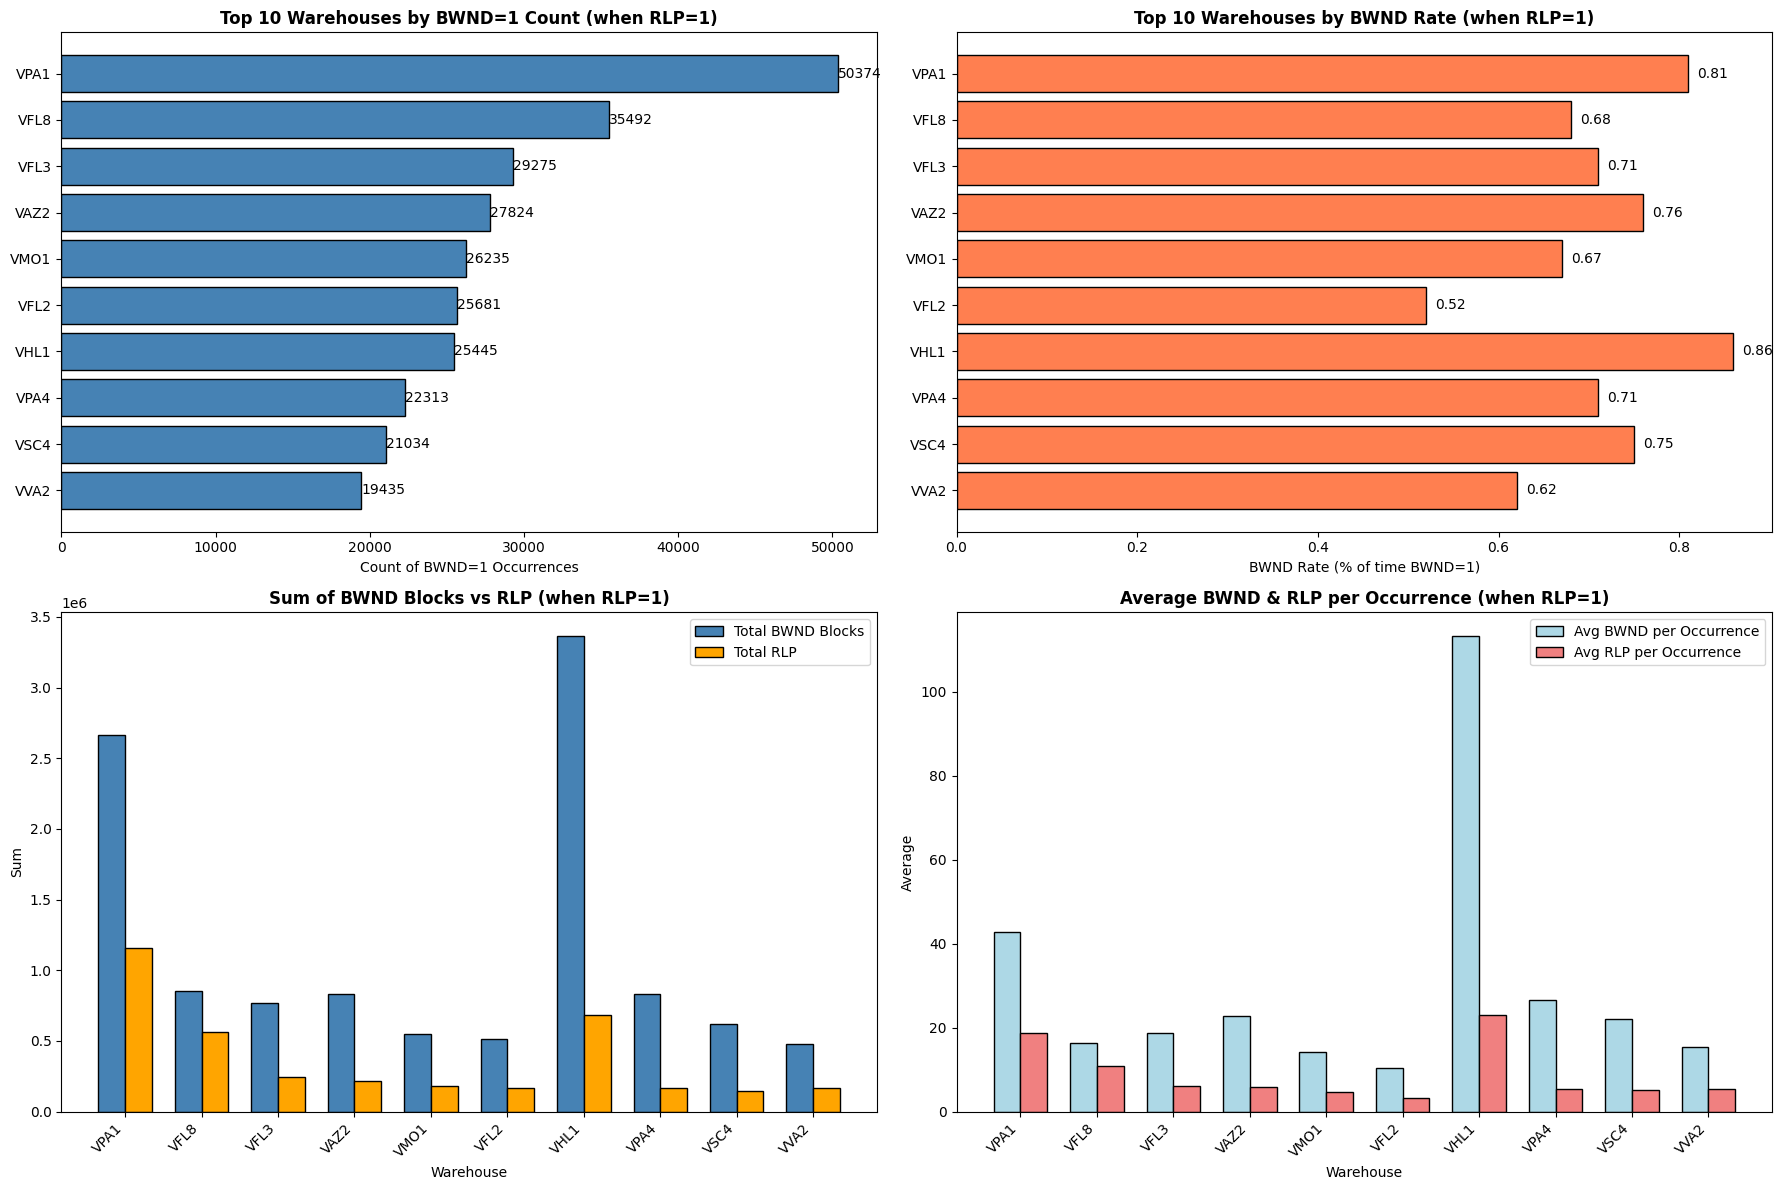


DETAILED METRICS FOR TOP 10 WAREHOUSES
              BWND=1 Count  BWND Rate  Sum BWND Blocks  Sum RLP  RLP Occurrences  Avg BWND/Occur  Avg RLP/Occur
warehouse_id                                                                                                   
VPA1                 50374       0.81          2661619  1160650            62143           42.83          18.68
VFL8                 35492       0.68           851698   565735            52313           16.28          10.81
VFL3                 29275       0.71           768595   247332            40982           18.75           6.04
VAZ2                 27824       0.76           833370   213819            36667           22.73           5.83
VMO1                 26235       0.67           549897   178807            38962           14.11           4.59
VFL2                 25681       0.52           515385   166485            49405           10.43           3.37
VHL1                 25445       0.86          3364144   680463 

In [38]:
# ============================================================================
# VISUALIZATION
# ============================================================================
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Get top 10 warehouses
top_warehouses = warehouse_analysis.head(10)

# Plot 1: BWND Count (times BWND=1 when RLP=1)
axes[0, 0].barh(range(len(top_warehouses)), top_warehouses['bwnd_count'], color='steelblue', edgecolor='black')
axes[0, 0].set_yticks(range(len(top_warehouses)))
axes[0, 0].set_yticklabels(top_warehouses.index)
axes[0, 0].set_title('Top 10 Warehouses by BWND=1 Count (when RLP=1)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Count of BWND=1 Occurrences')
axes[0, 0].invert_yaxis()

# Add value labels
for i, v in enumerate(top_warehouses['bwnd_count']):
    axes[0, 0].text(v + 0.5, i, f'{int(v)}', va='center')

# Plot 2: BWND Rate
axes[0, 1].barh(range(len(top_warehouses)), top_warehouses['bwnd_rate'], color='coral', edgecolor='black')
axes[0, 1].set_yticks(range(len(top_warehouses)))
axes[0, 1].set_yticklabels(top_warehouses.index)
axes[0, 1].set_title('Top 10 Warehouses by BWND Rate (when RLP=1)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('BWND Rate (% of time BWND=1)')
axes[0, 1].invert_yaxis()

# Add value labels
for i, v in enumerate(top_warehouses['bwnd_rate']):
    axes[0, 1].text(v + 0.01, i, f'{v:.2f}', va='center')

# Plot 3: Total BWND Blocks vs Total RLP
x = np.arange(len(top_warehouses))
width = 0.35

bars1 = axes[1, 0].bar(x - width/2, top_warehouses['total_bwnd_blocks'], width, label='Total BWND Blocks', color='steelblue', edgecolor='black')
bars2 = axes[1, 0].bar(x + width/2, top_warehouses['total_rlp'], width, label='Total RLP', color='orange', edgecolor='black')

axes[1, 0].set_xlabel('Warehouse')
axes[1, 0].set_ylabel('Sum')
axes[1, 0].set_title('Sum of BWND Blocks vs RLP (when RLP=1)', fontsize=12, fontweight='bold')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(top_warehouses.index, rotation=45, ha='right')
axes[1, 0].legend()

# Plot 4: Average BWND and RLP per Occurrence
bars1 = axes[1, 1].bar(x - width/2, top_warehouses['avg_bwnd_per_occurrence'], width, label='Avg BWND per Occurrence', color='lightblue', edgecolor='black')
bars2 = axes[1, 1].bar(x + width/2, top_warehouses['avg_rlp_per_occurrence'], width, label='Avg RLP per Occurrence', color='lightcoral', edgecolor='black')

axes[1, 1].set_xlabel('Warehouse')
axes[1, 1].set_ylabel('Average')
axes[1, 1].set_title('Average BWND & RLP per Occurrence (when RLP=1)', fontsize=12, fontweight='bold')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(top_warehouses.index, rotation=45, ha='right')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# ============================================================================
# DETAILED TABLE
# ============================================================================
print("\n" + "="*100)
print("DETAILED METRICS FOR TOP 10 WAREHOUSES")
print("="*100)

detailed_table = top_warehouses.copy()
detailed_table.columns = [
    'BWND=1 Count',
    'BWND Rate',
    'Sum BWND Blocks',
    'Sum RLP',
    'RLP Occurrences',
    'Avg BWND/Occur',
    'Avg RLP/Occur'
]

print(detailed_table.to_string())


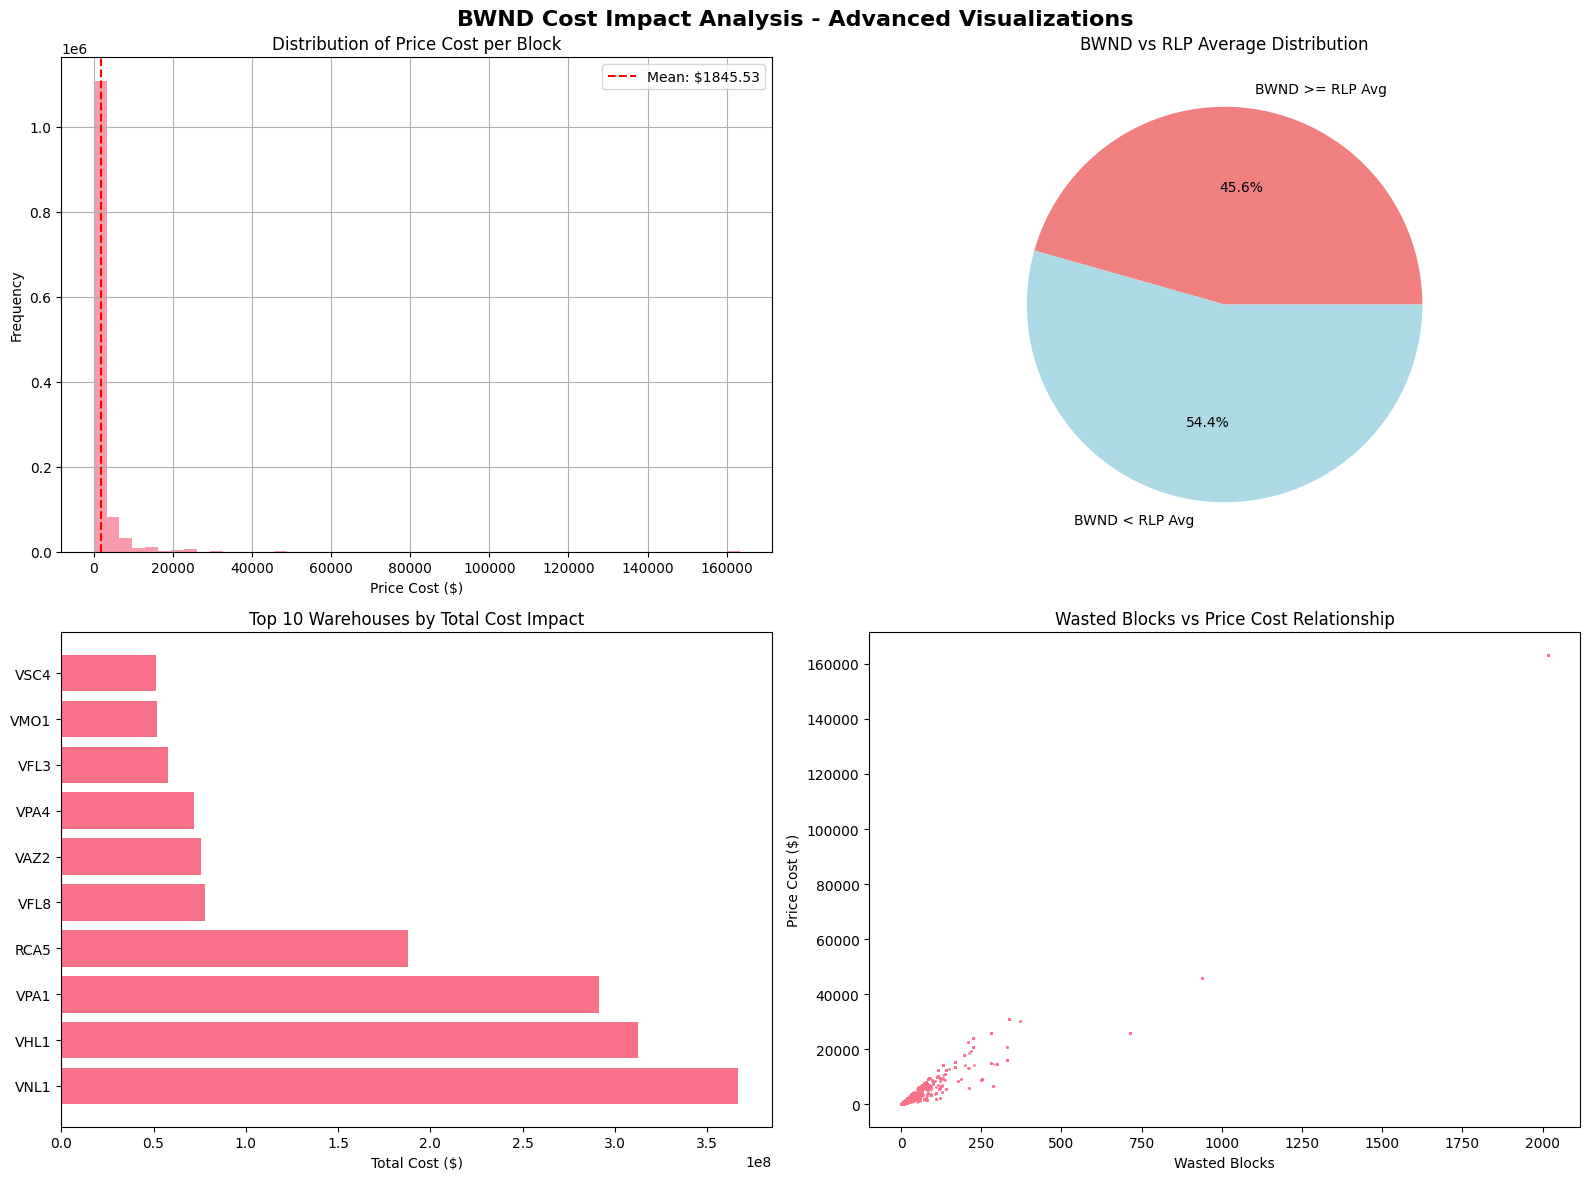


📅 Cost Analysis by Time Patterns:


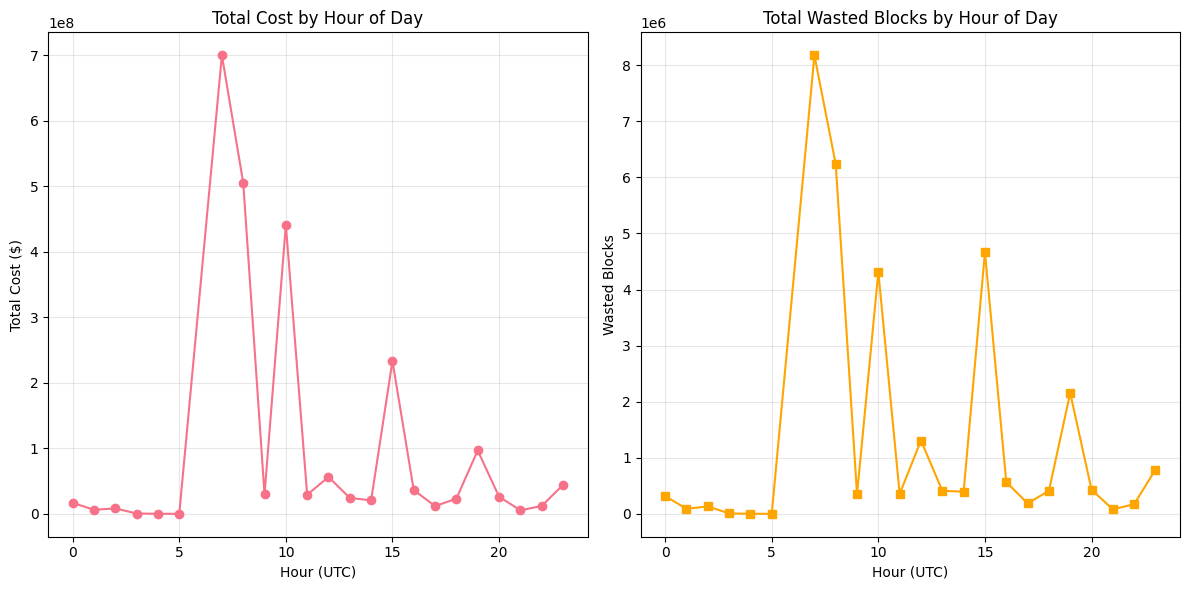


🕐 Peak Cost Hours:
  07:00 - Cost: $699,773,566.50, Wasted Blocks: 8,178,738
  08:00 - Cost: $505,150,113.75, Wasted Blocks: 6,238,404
  10:00 - Cost: $440,935,085.25, Wasted Blocks: 4,314,097
  15:00 - Cost: $233,128,462.25, Wasted Blocks: 4,667,326
  19:00 - Cost: $96,680,886.50, Wasted Blocks: 2,154,357


In [51]:
# Create visualizations for cost analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('BWND Cost Impact Analysis - Advanced Visualizations', fontsize=16, fontweight='bold')

# 1. Distribution of Price Cost
df['price_cost'].hist(bins=50, ax=axes[0,0], alpha=0.7)
axes[0,0].set_title('Distribution of Price Cost per Block')
axes[0,0].set_xlabel('Price Cost ($)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(df['price_cost'].mean(), color='red', linestyle='--', label=f'Mean: ${df["price_cost"].mean():.2f}')
axes[0,0].legend()

# 2. BWND vs RLP Average Comparison
comparison_data = [
    df['BWND_gte_RLP_avg'].sum(),
    df['BWND_lt_RLP_avg'].sum()
]
labels = ['BWND >= RLP Avg', 'BWND < RLP Avg']
colors = ['lightcoral', 'lightblue']

axes[0,1].pie(comparison_data, labels=labels, colors=colors, autopct='%1.1f%%')
axes[0,1].set_title('BWND vs RLP Average Distribution')

# 3. Top Warehouses by Total Cost
top_cost_warehouses = warehouse_costs.head(10)
axes[1,0].barh(range(len(top_cost_warehouses)), top_cost_warehouses['price_cost'])
axes[1,0].set_yticks(range(len(top_cost_warehouses)))
axes[1,0].set_yticklabels(top_cost_warehouses.index)
axes[1,0].set_title('Top 10 Warehouses by Total Cost Impact')
axes[1,0].set_xlabel('Total Cost ($)')

# 4. Wasted Blocks vs Cost Scatter
sample_data = df.sample(n=min(10000, len(df)))  # Sample for performance
scatter = axes[1,1].scatter(sample_data['wasted_blocks'], sample_data['price_cost'], alpha=0.6, s=1)
axes[1,1].set_title('Wasted Blocks vs Price Cost Relationship')
axes[1,1].set_xlabel('Wasted Blocks')
axes[1,1].set_ylabel('Price Cost ($)')

plt.tight_layout()
plt.show()

# Additional cost analysis by time
print("\n📅 Cost Analysis by Time Patterns:")
hourly_costs = df.groupby('hour').agg({
    'price_cost': 'sum',
    'wasted_blocks': 'sum'
}).round(2)

# Plot hourly cost patterns
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
hourly_costs['price_cost'].plot(kind='line', marker='o')
plt.title('Total Cost by Hour of Day')
plt.xlabel('Hour (UTC)')
plt.ylabel('Total Cost ($)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
hourly_costs['wasted_blocks'].plot(kind='line', marker='s', color='orange')
plt.title('Total Wasted Blocks by Hour of Day')
plt.xlabel('Hour (UTC)')
plt.ylabel('Wasted Blocks')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🕐 Peak Cost Hours:")
top_cost_hours = hourly_costs.sort_values('price_cost', ascending=False).head(5)
for hour, row in top_cost_hours.iterrows():
    print(f"  {hour:02d}:00 - Cost: ${row['price_cost']:,.2f}, Wasted Blocks: {row['wasted_blocks']:,.0f}")

In [39]:
# ============================================================================
# SUMMARY STATISTICS
# ============================================================================
print("\n" + "="*100)
print("SUMMARY FOR TOP 10 WAREHOUSES")
print("="*100)
print(f"Total RLP=1 occurrences: {top_warehouses['rlp_occurrences'].sum():,.0f}")
print(f"Total BWND=1 occurrences: {top_warehouses['bwnd_count'].sum():,.0f}")
print(f"Total BWND blocks: {top_warehouses['total_bwnd_blocks'].sum():,.0f}")
print(f"Total RLP: {top_warehouses['total_rlp'].sum():,.0f}")
print(f"Average BWND rate: {top_warehouses['bwnd_rate'].mean():.2%}")



SUMMARY FOR TOP 10 WAREHOUSES
Total RLP=1 occurrences: 400,889
Total BWND=1 occurrences: 283,108
Total BWND blocks: 11,474,339
Total RLP: 3,692,844
Average BWND rate: 70.90%


In [ ]:
'''
Query code -

WITH combined_data AS (
    SELECT 
        t1.*,  
        t2.planned_qty,
        t2.wave,
        t2.promisewindow, t2.promisewindownumber,
        t2.reporting_date,
        t2.block_length,
        t2.date,
        t2.block_start_wave,
        t2.wave_mins,
        t2.wave_temp
    FROM andes."amazon-flex-bi"."d_flex_block_actuals" t1
    LEFT JOIN (
        -- Your first query as subquery t2
        SELECT udph.*,
        convert_timezone(time_zone, block_interval_start) as BLOCK_START_DATETIME_LOCAL,
        duration/3600 as block_length,
        BLOCK_START_DATETIME_LOCAL::DATE as date,
        TO_CHAR(BLOCK_START_DATETIME_LOCAL,'HH24:MI') as block_start_wave,
        EXTRACT(MINUTE FROM BLOCK_START_DATETIME_LOCAL) AS wave_mins,
        cast(cast(EXTRACT(hour from BLOCK_START_DATETIME_LOCAL) as varchar) + ':' + 
             cast(case when wave_mins >= 0 and wave_mins < 15 then 0
                      when wave_mins >= 15 and wave_mins < 30 then 15
                      when wave_mins >= 30 and wave_mins < 45 then 30
                      ELSE 45 END AS varchar) AS TIME) as wave_temp,
        case when wave_temp = '20:07' then '19:15' ELSE wave_temp end as wave,
        case when wave_temp = '21:17' then dateadd(day,1,trunc(BLOCK_START_DATETIME_LOCAL)) 
             else trunc(BLOCK_START_DATETIME_LOCAL) end as reporting_date,
   CASE WHEN wave between '00:00' and '05:00' then 'BREAKFAST'
             WHEN wave between '05:15' and '08:00' then 'BRUNCH'
             WHEN wave between '08:15' and '12:00' then 'LUNCH'
             WHEN wave between '12:15' and '15:00' then 'DINNER'
             else 'BEDTIME' END as promisewindow,
    CASE WHEN wave between '00:00' and '05:00' then        
                 '8'        
              WHEN wave between '05:15' and '08:00' then        
                 '11'        
              WHEN wave between '08:15' and '12:00' then        
                 '15'        
              WHEN wave between '12:15' and '15:00' then        
                 '18'        
              else        
                 '22'         
                 END        
    as promisewindownumber,
        warehouse_id
        FROM andes.scar_ssd_staging.tywin_clp_block_generated udph 
        LEFT JOIN andes."amazon-flex-bi".d_flex_service_area as sa
        ON udph.region_id = sa.region_id
        AND udph.service_area_id = sa.service_area_id
        
        --there is another block type that is called ReactiveGenerativeBlocks but LP Tech team said RPB is the right on
        WHERE block_type = 'ReactivePlanningBlocks'
        AND block_id is not null
        
        -- I am taking for all stations for the last two months data
        AND (BLOCK_START_DATETIME_LOCAL::date >= '2025-08-12' 
             AND BLOCK_START_DATETIME_LOCAL::date <= '2025-10-12')
    ) t2
    ON t1.service_area_id = t2.service_area_id
    AND t1.block_start_datetime_utc = t2.start_time_begin_utc
    and t1.block_start_datetime_local  = t2.BLOCK_START_DATETIME_LOCAL
    AND t1.duration_in_mins = t2.duration/60
    WHERE t2.block_type = 'ReactivePlanningBlocks'
)
SELECT 
    warehouse_id,
    block_start_datetime_utc, block_start_datetime_local,
    duration_in_mins as duration,
    guaranteed_earnings_price_per_hr,
    block_length,
    block_start_wave,
    wave_mins,
    promisewindow, promisewindownumber,
    
    --technically we can remove warehouseid and  block_start_datetime_utc as service ID and block_start_datetime_local would be the same thing
    SUM(planned_qty) OVER (PARTITION BY warehouse_id, service_area_id, block_start_datetime_local, block_start_datetime_utc, duration_in_mins, guaranteed_earnings_price_per_hr) as sum_metric_RLP_adds,
    AVG(planned_qty) OVER (PARTITION BY warehouse_id, service_area_id, block_start_datetime_local, block_start_datetime_utc, duration_in_mins, guaranteed_earnings_price_per_hr) as avg_metric_RLP_adds,
    MAX(planned_qty) OVER (PARTITION BY warehouse_id, service_area_id, block_start_datetime_local, block_start_datetime_utc, duration_in_mins, guaranteed_earnings_price_per_hr) as max_metric_RLP_adds,
    MIN(planned_qty) OVER (PARTITION BY warehouse_id, service_area_id, block_start_datetime_local, block_start_datetime_utc, duration_in_mins, guaranteed_earnings_price_per_hr) as min_metric_RLP_adds,
    (MAX(planned_qty) OVER (PARTITION BY warehouse_id, service_area_id, block_start_datetime_local, block_start_datetime_utc, duration_in_mins, guaranteed_earnings_price_per_hr) + 
     MIN(planned_qty) OVER (PARTITION BY  warehouse_id,service_area_id, block_start_datetime_local, block_start_datetime_utc, duration_in_mins, guaranteed_earnings_price_per_hr))/2 as avg_max_min_metric_RLP_adds,
    
    -- Block type sums
    SUM(checked_in_block) OVER (PARTITION BY warehouse_id, service_area_id, block_start_datetime_local, block_start_datetime_utc, duration_in_mins, guaranteed_earnings_price_per_hr) as sum_checked_in_blocks,
    SUM(attended_block) OVER (PARTITION BY warehouse_id, service_area_id, block_start_datetime_local, block_start_datetime_utc,duration_in_mins, guaranteed_earnings_price_per_hr) as sum_attended_blocks,
    SUM(bwnd) OVER (PARTITION BY warehouse_id, service_area_id, block_start_datetime_local, block_start_datetime_utc,duration_in_mins, guaranteed_earnings_price_per_hr) as sum_bwnd_blocks,
    SUM(surged_block) OVER (PARTITION BY warehouse_id, service_area_id, block_start_datetime_local, block_start_datetime_utc,duration_in_mins, guaranteed_earnings_price_per_hr) as sum_surged_blocks,
    SUM(extended_block) OVER (PARTITION BY warehouse_id, service_area_id, block_start_datetime_local, block_start_datetime_utc,duration_in_mins, guaranteed_earnings_price_per_hr) as sum_extended_blocks
FROM combined_data;


'''

In [ ]:
ROUTES UNassigned analysis below! 

,date,planned_route_id,actual_route_id,station_code,promise_window,matching,da_block_start_time_local,da_route_closed_time_local,route_close_date,route_stage_time,route_stage_date,reporting_date,da_route_closure_reason,route_length_category,route_close_wave,route_stage_wave
0,2025-06-21 00:00:00,8628bf6a-786f-4e0a-8a62-e7a712c38972,b33635f1-bd78-42cf-bc94-8f28c6494d9b,VMC3,unknown,matched,2025-06-21 17:30:00,2025-06-21 14:03:14,2025-06-21,2025-06-21 14:07:11,2025-06-21,2025-06-21,MaxPackageCount,3.5hr,14:15,14:15
1,2025-06-20 00:00:00,f45f3d3b-9fba-4265-8a1b-2ee813defb9e,7e53c80b-e1a1-40ee-ae12-23fa5a4280bf,VIN9,Brunch,matched,2025-06-20 04:00:00,2025-06-20 02:23:06,2025-06-20,2025-06-20 02:27:40,2025-06-20,2025-06-20,MaxVolumeReached,4hr,02:30,02:30
2,2025-06-22 00:00:00,49385ee3-ca5d-4603-bbc6-474694d33f4d,a52d7785-9b82-4642-b8b9-d5e1c66a3818,VAZ3,Breakfast,matched,2025-06-22 04:00:00,2025-06-22 00:40:04,2025-06-22,2025-06-22 00:48:54,2025-06-22,2025-06-22,PromiseTimeAutoClosure,2hr,00:45,01:00
3,2025-06-21 00:00:00,471a1e01-e2c9-45ce-9595-29ca2dc1e115,78c7de39-0c3e-4b3a-9b67-3bea584051f1,VGA1,Breakfast,matched,2025-06-22 03:45:00,2025-06-21 23:43:09,2025-06-21,2025-06-21 23:46:18,2025-06-21,2025-06-22,NonCriticalBlockMatch,4hr,23:45,00:00
4,2025-06-21 00:00:00,a788a39d-d41e-4759-b0a5-4edea8dcb07a,cdf70902-1145-4eb8-ae20-8e99dd1515f3,VPA4,unknown,unmatched,NaN,2025-06-21 18:40:11,2025-06-21,2025-06-21 18:43:39,2025-06-21,2025-06-21,PromiseTimeAutoClosure,2hr,18:45,18:45


In [3]:
df.info()
df.describe()
df.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   date                        1000 non-null   object
 1   planned_route_id            1000 non-null   object
 2   actual_route_id             1000 non-null   object
 3   station_code                1000 non-null   object
 4   promise_window              1000 non-null   object
 5   matching                    1000 non-null   object
 6   da_block_start_time_local   946 non-null    object
 7   da_route_closed_time_local  1000 non-null   object
 8   route_close_date            1000 non-null   object
 9   route_stage_time            1000 non-null   object
 10  route_stage_date            1000 non-null   object
 11  reporting_date              1000 non-null   object
 12  da_route_closure_reason     1000 non-null   object
 13  route_length_category       1000 non-null   objec

(1000, 16)

In [21]:
df.columns

Index(['date', 'planned_route_id', 'actual_route_id', 'station_code',
       'promise_window', 'matching', 'da_block_start_time_local',
       'da_route_closed_time_local', 'route_close_date', 'route_stage_time',
       'route_stage_date', 'reporting_date', 'da_route_closure_reason',
       'route_length_category', 'route_close_wave', 'route_stage_wave'],
      dtype='object')

In [22]:
df['route_stage_time'] = pd.to_datetime(df['route_stage_time'])

In [23]:
#creating the new column - 'route_stage_wave_time'
df['route_stage_wave_time'] = pd.to_datetime(df['route_stage_date'] + ' ' 
                                             + df['route_stage_wave'] 
                                             + ':00'
                                             )
print(df.columns)

Index(['date', 'planned_route_id', 'actual_route_id', 'station_code',
       'promise_window', 'matching', 'da_block_start_time_local',
       'da_route_closed_time_local', 'route_close_date', 'route_stage_time',
       'route_stage_date', 'reporting_date', 'da_route_closure_reason',
       'route_length_category', 'route_close_wave', 'route_stage_wave',
       'route_stage_wave_time'],
      dtype='object')


In [24]:
# %%

# Create pivot table with matched/unmatched as columns
matching_pivot = df.pivot_table(
    index=['route_stage_wave_time', 'station_code', 'promise_window'],
    columns='matching',
    values='planned_route_id',
    aggfunc='count',
    fill_value=0
).reset_index()

# Flatten column names
matching_pivot.columns.name = None

# Add total column
matching_pivot['total_routes'] = matching_pivot['matched'] + matching_pivot['unmatched']

# Add match rate
matching_pivot['match_rate_%'] = (
    matching_pivot['matched'] / matching_pivot['total_routes'] * 100
).round(2)

print(matching_pivot)

    route_stage_wave_time station_code promise_window  matched  unmatched  \
0     2025-06-20 00:45:00         VAX7      Breakfast        1          0   
1     2025-06-20 01:00:00         VAX1      Breakfast        1          0   
2     2025-06-20 01:00:00         VKY2      Breakfast        1          0   
3     2025-06-20 01:00:00         VOR3      Breakfast        1          0   
4     2025-06-20 01:00:00         VTX3      Breakfast        1          0   
..                    ...          ...            ...      ...        ...   
991   2025-06-29 22:45:00         VNY5      Breakfast        1          0   
992   2025-06-29 23:15:00         VMO2      Breakfast        1          0   
993   2025-06-29 23:15:00         VNC6      Breakfast        1          0   
994   2025-06-29 23:30:00         VAX5      Breakfast        1          0   
995   2025-06-29 23:45:00         VOR3      Breakfast        1          0   

     total_routes  match_rate_%  
0               1         100.0  
1      

In [25]:
def analyze_route_matching(df, exclude_placeholder=True):
    """
    Comprehensive route matching analysis
    
    Parameters:
    - df: DataFrame with route data
    - exclude_placeholder: Remove 2030-01-01 placeholder dates
    """
    
    # Main summary
    summary = df.groupby([
        'route_stage_wave_time',
        'station_code',
        'promise_window'
    ]).agg({
        'planned_route_id': 'count',
        'matching': lambda x: (x == 'matched').sum()
    }).reset_index()
    
    summary.columns = ['route_stage_wave_time', 'station_code', 'promise_window', 
                       'total_routes', 'matched_routes']
    
    summary['unmatched_routes'] = summary['total_routes'] - summary['matched_routes']
    summary['match_rate_%'] = (summary['matched_routes'] / summary['total_routes'] * 100).round(2)
    
    # Sort by wave time and station
    summary = summary.sort_values(['route_stage_wave_time', 'station_code', 'promise_window'])
    
    return summary

# Use the function
result = analyze_route_matching(df, exclude_placeholder=True)
print(result)

    route_stage_wave_time station_code promise_window  total_routes  \
0     2025-06-20 00:45:00         VAX7      Breakfast             1   
1     2025-06-20 01:00:00         VAX1      Breakfast             1   
2     2025-06-20 01:00:00         VKY2      Breakfast             1   
3     2025-06-20 01:00:00         VOR3      Breakfast             1   
4     2025-06-20 01:00:00         VTX3      Breakfast             1   
..                    ...          ...            ...           ...   
991   2025-06-29 22:45:00         VNY5      Breakfast             1   
992   2025-06-29 23:15:00         VMO2      Breakfast             1   
993   2025-06-29 23:15:00         VNC6      Breakfast             1   
994   2025-06-29 23:30:00         VAX5      Breakfast             1   
995   2025-06-29 23:45:00         VOR3      Breakfast             1   

     matched_routes  unmatched_routes  match_rate_%  
0                 1                 0         100.0  
1                 1                 0  

In [29]:
unmatched_df = df[df['matching'] == 'unmatched'].copy()

In [32]:
dataset_1 = unmatched_df.groupby(['station_code', 
                                  'promise_window', 
                                  'route_stage_wave_time',
                                  'route_length_category']).size().reset_index(name='unmatched_routes')

dataset_1 = dataset_1.sort_values([
    'station_code', 
    'promise_window', 
    'route_stage_wave_time']). reset_index(drop=True)

print("=== DATASET 1: Unmatched Routes Summary ===")
print(f"Shape: {dataset_1.shape}")
print(f"\nFirst 10 rows:")
print(dataset_1.head(10))

# Display info
print(f"\nColumn dtypes:")
print(dataset_1.dtypes)

=== DATASET 1: Unmatched Routes Summary ===
Shape: (54, 5)

First 10 rows:
  station_code promise_window route_stage_wave_time route_length_category  \
0         VAH1         Dinner   2025-06-21 14:15:00                   4hr   
1         VAX2        unknown   2025-06-20 19:00:00                 2.5hr   
2         VAX5         Dinner   2025-06-26 14:45:00                 3.5hr   
3         VAX7        unknown   2025-06-24 19:00:00                 2.5hr   
4         VAZ2          Lunch   2025-06-25 12:00:00                   3hr   
5         VBW1         Dinner   2025-06-24 15:00:00                   3hr   
6         VCA5        unknown   2025-06-22 19:00:00                   2hr   
7         VCA5        unknown   2025-06-25 19:00:00                 2.5hr   
8         VCA7          Lunch   2025-06-28 11:30:00                 3.5hr   
9         VCO1         Dinner   2025-06-26 14:15:00                   4hr   

   unmatched_routes  
0                 1  
1                 1  
2          

In [33]:
# Create aggregated dataset with closure reason
dataset_2 = unmatched_df.groupby([
    'station_code',
    'promise_window',
    'route_stage_wave_time',
    'route_length_category',
    'da_route_closure_reason'
]).size().reset_index(name='unmatched_routes')

# Sort for better readability
dataset_2 = dataset_2.sort_values([
    'station_code', 
    'route_stage_wave_time', 
    'promise_window',
    'unmatched_routes'
], ascending=[True, True, True, False]).reset_index(drop=True)

print("=== DATASET 2: Unmatched Routes with Closure Reason ===")
print(f"Shape: {dataset_2.shape}")
print(f"\nFirst 10 rows:")
print(dataset_2.head(10))

# Display info
print(f"\nColumn dtypes:")
print(dataset_2.dtypes)

=== DATASET 2: Unmatched Routes with Closure Reason ===
Shape: (54, 6)

First 10 rows:
  station_code promise_window route_stage_wave_time route_length_category  \
0         VAH1         Dinner   2025-06-21 14:15:00                   4hr   
1         VAX2        unknown   2025-06-20 19:00:00                 2.5hr   
2         VAX5         Dinner   2025-06-26 14:45:00                 3.5hr   
3         VAX7        unknown   2025-06-24 19:00:00                 2.5hr   
4         VAZ2          Lunch   2025-06-25 12:00:00                   3hr   
5         VBW1         Dinner   2025-06-24 15:00:00                   3hr   
6         VCA5        unknown   2025-06-22 19:00:00                   2hr   
7         VCA5        unknown   2025-06-25 19:00:00                 2.5hr   
8         VCA7          Lunch   2025-06-28 11:30:00                 3.5hr   
9         VCO1         Dinner   2025-06-26 14:15:00                   4hr   

  da_route_closure_reason  unmatched_routes  
0  PromiseTimeAppro

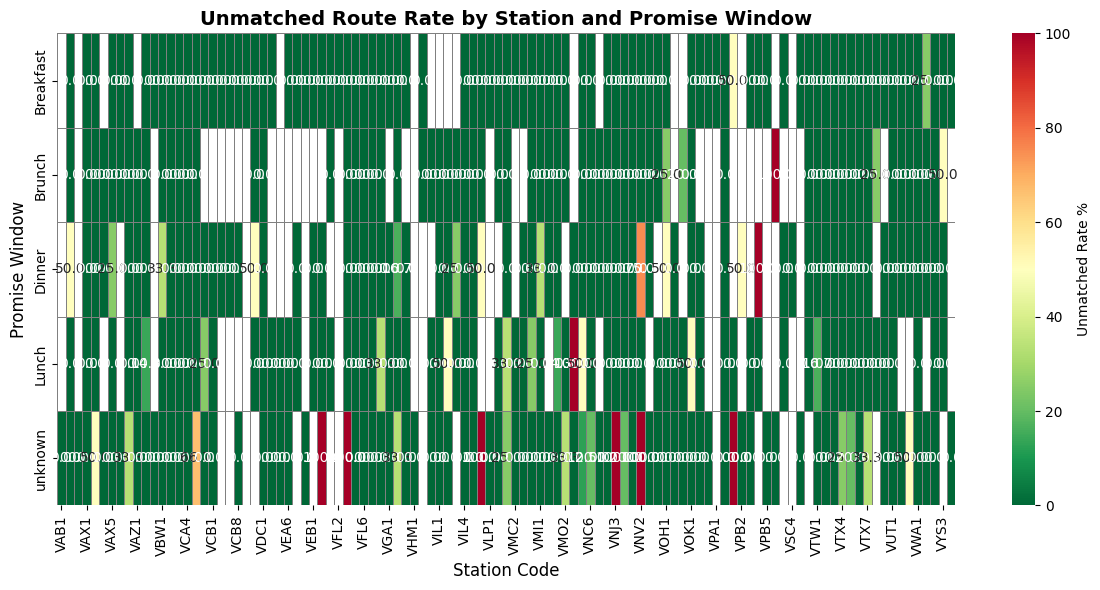

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter for unmatched routes
unmatched_df = df[df['matching'] == 'unmatched'].copy()

# Create match rate heatmap
match_rate = df.groupby(['station_code', 'promise_window']).agg({
    'planned_route_id': 'count',
    'matching': lambda x: (x == 'unmatched').sum()
}).reset_index()
match_rate['unmatch_rate_%'] = (match_rate['matching'] / match_rate['planned_route_id'] * 100).round(1)

pivot_match = match_rate.pivot(index='promise_window', columns='station_code', values='unmatch_rate_%')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_match, annot=True, fmt='.1f', cmap='RdYlGn_r', 
            vmin=0, vmax=100, cbar_kws={'label': 'Unmatched Rate %'},
            linewidths=0.5, linecolor='gray')
plt.title('Unmatched Route Rate by Station and Promise Window', fontsize=14, fontweight='bold')
plt.xlabel('Station Code', fontsize=12)
plt.ylabel('Promise Window', fontsize=12)
plt.tight_layout()
plt.show()

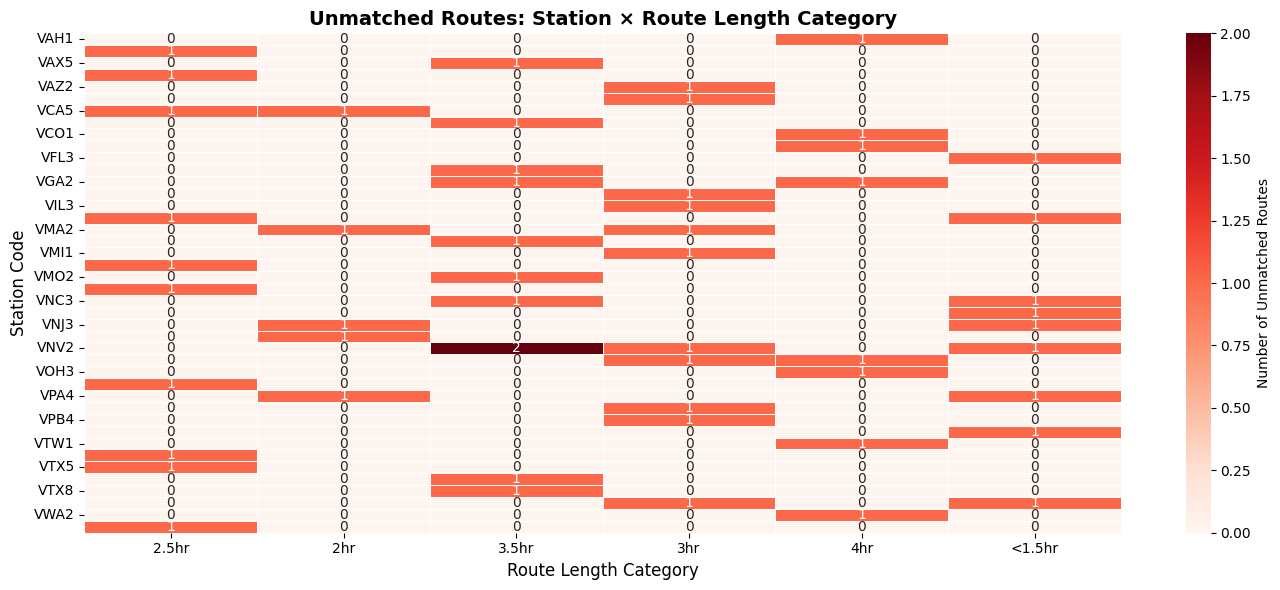

In [27]:
# Unmatched routes by station and route length
unmatched_length = unmatched_df.groupby(['station_code', 'route_length_category']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 6))
sns.heatmap(unmatched_length, annot=True, fmt='d', cmap='Reds', 
            cbar_kws={'label': 'Number of Unmatched Routes'},
            linewidths=0.5, linecolor='white')
plt.title('Unmatched Routes: Station × Route Length Category', fontsize=14, fontweight='bold')
plt.xlabel('Route Length Category', fontsize=12)
plt.ylabel('Station Code', fontsize=12)
plt.tight_layout()
plt.show()

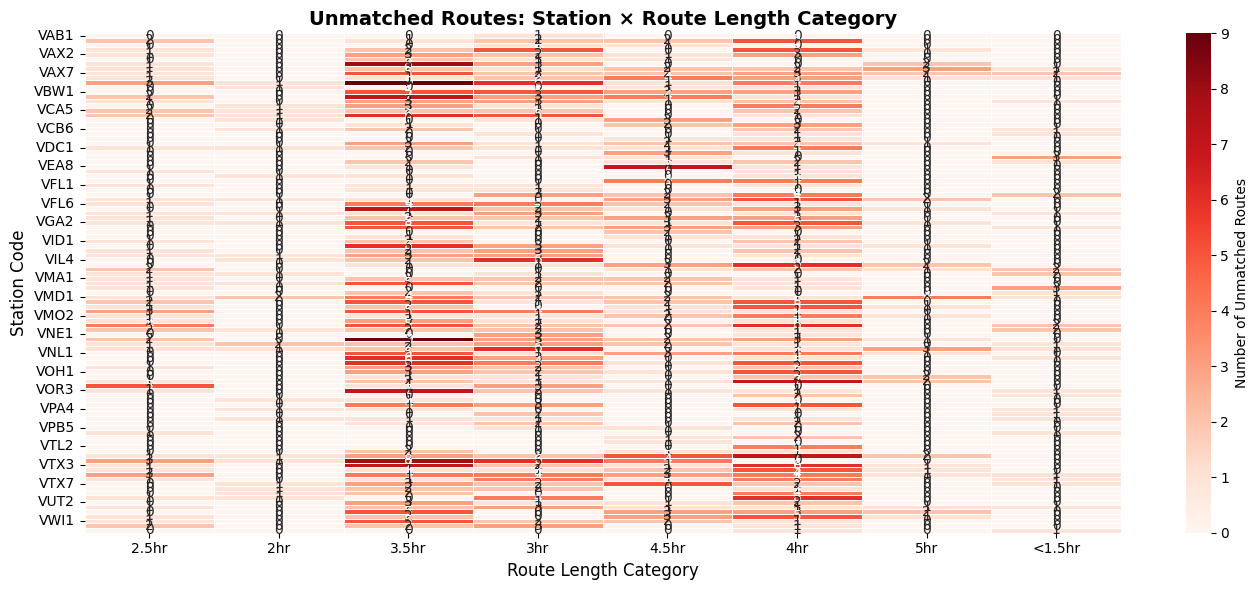

In [18]:
# Unmatched routes by station and route length
unmatched_length = df.groupby(['station_code', 'route_length_category']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 6))
sns.heatmap(unmatched_length, annot=True, fmt='d', cmap='Reds', 
            cbar_kws={'label': 'Number of Unmatched Routes'},
            linewidths=0.5, linecolor='white')
plt.title('Unmatched Routes: Station × Route Length Category', fontsize=14, fontweight='bold')
plt.xlabel('Route Length Category', fontsize=12)
plt.ylabel('Station Code', fontsize=12)
plt.tight_layout()
plt.show()

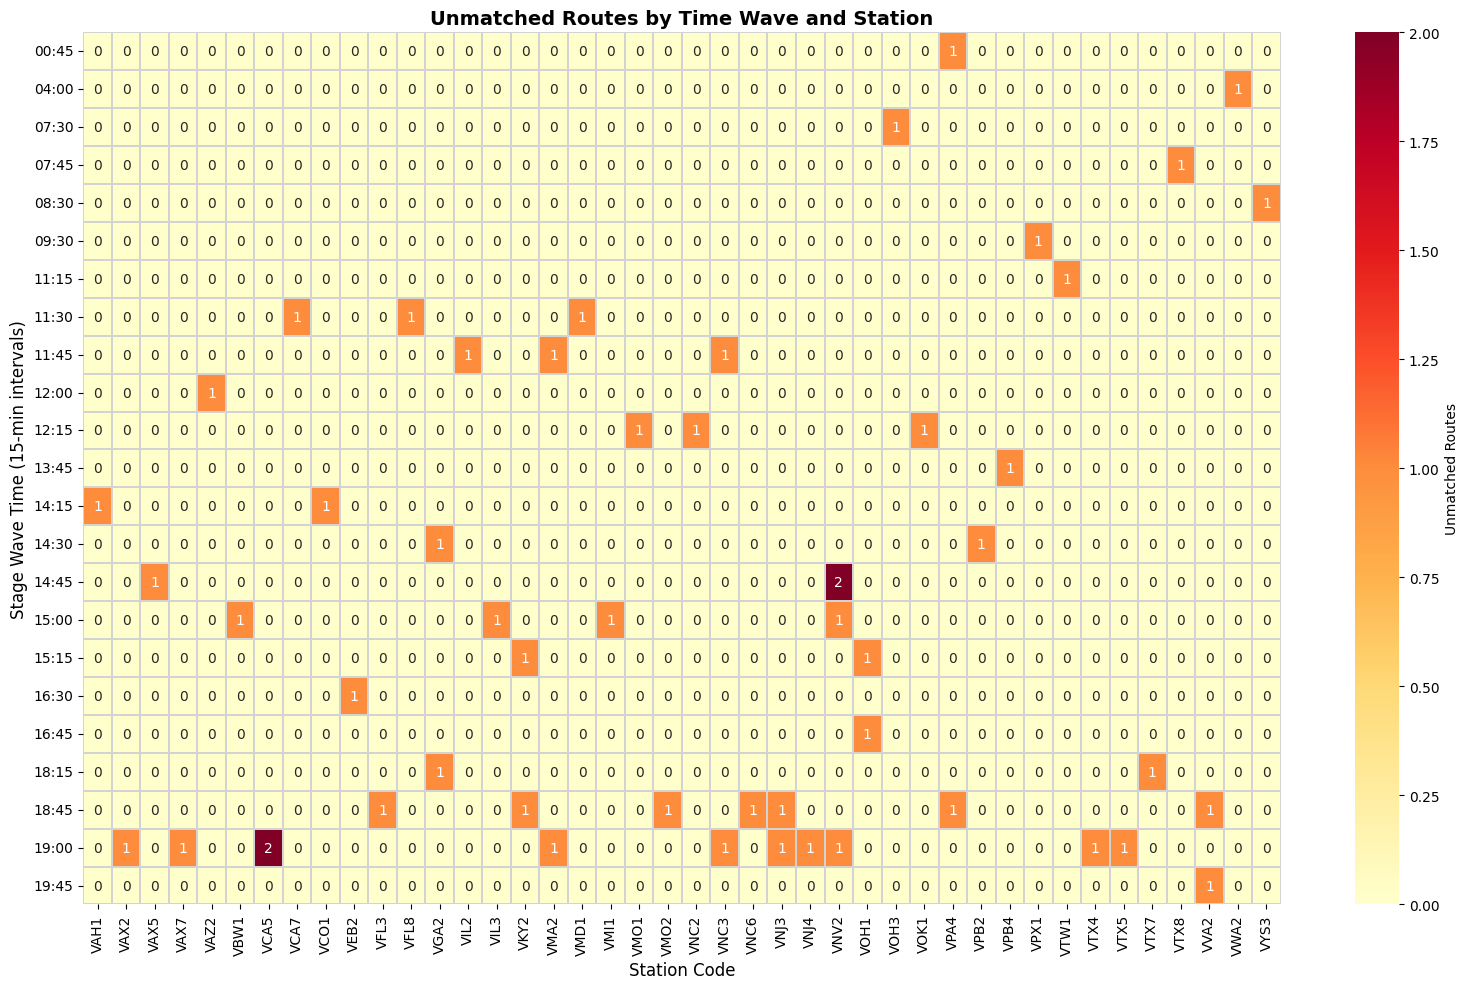

In [28]:
# Extract hour and wave for better visualization
unmatched_df['stage_hour'] = unmatched_df['route_stage_wave_time'].dt.hour
unmatched_df['stage_wave'] = unmatched_df['route_stage_wave_time'].dt.strftime('%H:%M')

# Count unmatched by time and station
time_station = unmatched_df.groupby(['stage_wave', 'station_code']).size().unstack(fill_value=0)

plt.figure(figsize=(16, 10))
sns.heatmap(time_station, cmap='YlOrRd', annot=True, fmt='d',
            cbar_kws={'label': 'Unmatched Routes'},
            linewidths=0.3, linecolor='lightgray')
plt.title('Unmatched Routes by Time Wave and Station', fontsize=14, fontweight='bold')
plt.xlabel('Station Code', fontsize=12)
plt.ylabel('Stage Wave Time (15-min intervals)', fontsize=12)
plt.tight_layout()
plt.show()